In [53]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Kaggle competition Down

In [7]:
! kaggle competitions download -c word2vec-nlp-tutorial

'kaggle'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [4]:
def summary_token(x):
    print('문장의 최대 길이:{}'.format(np.max(x)))
    print('문장의 최소 길이:{}'.format(np.min(x)))
    print('문장의 평균 길이:{}'.format(np.mean(x)))
    print('문장의 중앙 값:{}'.format(np.median(x)))
    print('문장의 1사분위 길이:{}'.format(np.percentile(x, 25)))
    print('문장의 3사분위 길이:{}'.format(np.percentile(x, 75)))

In [46]:
train_df = pd.read_csv('./datasets/word2vec-nlp-tutorial/data_in/labeledTrainData.tsv',
                      header=0,
                      delimiter='\t',
                      quoting=3) # quoting=3 --> quotation mark를 문자로 취급하여 읽어 들임 (일반 적으로 사용)

In [20]:
train_df.head()
train_df['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [21]:
print(train_df.shape)

(25000, 3)


In [22]:
## EDA
reviews = train_df['review']
## tokenizing
tokenizer_review_word = [len(r.split()) for r in reviews] # word
tokenizer_review_char = [len(s.replace(" ", "")) for s in reviews] # word

In [23]:
print(tokenizer_review_word[0:10])
print(tokenizer_review_char[0:10])

[433, 158, 378, 379, 367, 89, 112, 132, 163, 43]
[1872, 791, 2074, 1869, 1867, 355, 496, 599, 803, 202]


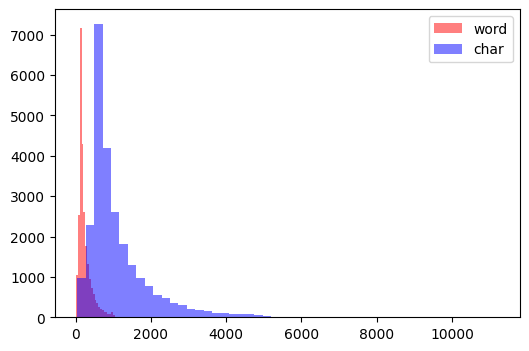

In [24]:
plt.figure(figsize=(6,4))
plt.hist(tokenizer_review_word, bins=50, color='r', alpha=0.5, label='word')
plt.hist(tokenizer_review_char, bins=50, color='b', alpha=0.5, label='char')
plt.legend()
plt.show()

In [25]:
summary_token(tokenizer_review_word)

문장의 최대 길이:2470
문장의 최소 길이:10
문장의 평균 길이:233.78824
문장의 중앙 값:174.0
문장의 1사분위 길이:127.0
문장의 3사분위 길이:284.0


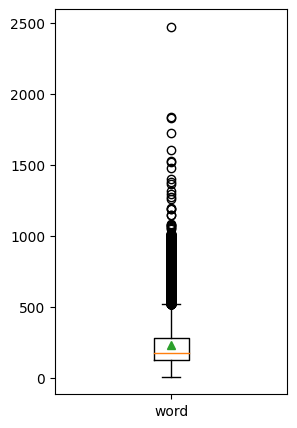

In [26]:
plt.figure(figsize=(3, 5))
plt.boxplot(tokenizer_review_word, labels=['word'], showmeans=True)
plt.show()

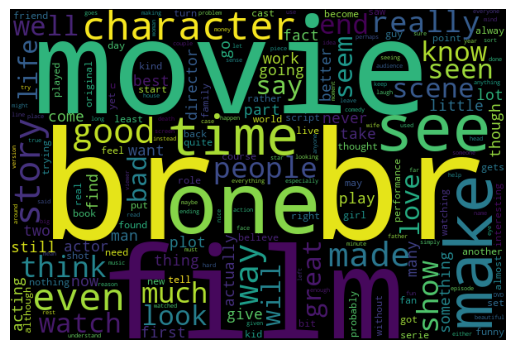

In [27]:
wordcloud = WordCloud(stopwords=STOPWORDS, width=600, height=400)
wordcloud.generate(" ".join(reviews))

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
df = pd.DataFrame([[1,2], [3, 4]], columns=['A', 'B'])

print(df)

def add_one(x):
    x += 1
    return x

print(df['A'].apply(add_one))     # pandas
print(df['A'].apply(lambda x: x+1)) # python built in 

   A  B
0  1  2
1  3  4
0    2
1    4
Name: A, dtype: int64
0    2
1    4
Name: A, dtype: int64


In [29]:
"?" in train_df['review'][0]
"?" in train_df['review'][1]
np.mean(train_df['review'].apply(lambda x: "?" in x))

0.29552

In [30]:
qmark = np.mean(train_df['review'].apply(lambda x: "?" in x))
fullstop = np.mean(train_df['review'].apply(lambda x: "." in x))
cap_first = np.mean(train_df['review'].apply(lambda x: x[1].isupper()))
cap_no = np.mean(train_df['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_df['review'].apply(lambda x: max([y.isdigit() for y in x])))

In [31]:
print('물음표가 있는 질문: {:.2f}%'.format(qmark*100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop*100))
print('첫문장에 대문자가 있는 질문: {:.2f}%'.format(cap_first*100))
print('대문가 있는 질문: {:.2f}%'.format(cap_no*100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers*100))

물음표가 있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫문장에 대문자가 있는 질문: 92.84%
대문가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%


In [36]:
import re
import json
from bs4 import BeautifulSoup
import tensorflow as tf
from nltk.corpus import stopwords
# import html5lib

In [34]:
html_text = \
'''
<p> O’er all the hilltops<br>
    Is quiet now,<br>
    In all the treetops<br>
    Hearest thou<br>
    Hardly a breath;<br>
    The birds are asleep in the trees:<br>
    Wait, soon like these<br>
    Thou too shalt rest.
</p>
'''

In [96]:
! pip install html5lib # ?

ERROR: Invalid requirement: '#'


In [111]:
print('html_text', html_text)

html_text_soup = BeautifulSoup(html_text).get_text()
print(html_text_soup)

html_text 
<p> O’er all the hilltops<br>
    Is quiet now,<br>
    In all the treetops<br>
    Hearest thou<br>
    Hardly a breath;<br>
    The birds are asleep in the trees:<br>
    Wait, soon like these<br>
    Thou too shalt rest.
</p>


 O’er all the hilltops
    Is quiet now,
    In all the treetops
    Hearest thou
    Hardly a breath;
    The birds are asleep in the trees:
    Wait, soon like these
    Thou too shalt rest.




In [36]:
re.sub('[^a-zA-Z]', ' ', html_text_soup)

'  O er all the hilltops     Is quiet now      In all the treetops     Hearest thou     Hardly a breath      The birds are asleep in the trees      Wait  soon like these     Thou too shalt rest   '

In [37]:
review = train_df['review'][0]
# print(review)

review_text = BeautifulSoup(review, 'html').get_text()
review_text = re.sub('[^a-zA-Z]', ' ', review_text)
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [38]:
print(len(stopwords.words('english')))
print(type(stopwords.words('english')))

stop_words = stopwords.words('english')
# stop_words = set(stop_words + ['br'])

179
<class 'list'>


In [39]:
review_text = review_text.lower()
splitted_word = review_text.split()

words = [w for w in splitted_word if w not in stop_words]
print('words', words)

clean_review = " ".join(words)
print(clean_review)

words ['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'l

In [2]:
DATA_IN_PATH = './datasets/word2vec-nlp-tutorial/data_in/'
DATA_OUT_PATH = './datasets/word2vec-nlp-tutorial/data_out/'

In [39]:
def preprocessing(review, mystopwords, remove_stopwords=False):
    review_text = BeautifulSoup(review, 'html').get_text()
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    words = review_text.lower().split()
    
    if remove_stopwords:
        stops =set(stopwords.words('english') + mystopwords)
        words = [w for w in words if w not in stops]
        
    clean_review = ' '.join(words)
    
    return clean_review

In [42]:
clean_train_reviews = []
for review in train_df['review']:
    clean_train_reviews.append(preprocessing(review, [], True))
    
clean_train_reviews

C:\Users\frank\AppData\Local\Temp\ipykernel_12908\17478469.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, 'html').get_text()


['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate worki

In [47]:
print(train_df['sentiment'])

0        1
1        1
2        0
3        0
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    1
Name: sentiment, Length: 25000, dtype: int64


In [51]:
clean_train_dict = { 'review':clean_train_reviews,
                     'sentiment':train_df['sentiment']}
clean_train_df = pd.DataFrame(clean_train_dict)
clean_train_df.head()



,review,sentiment
0,stuff going moment mj started listening music ...,1
1,classic war worlds timothy hines entertaining ...,1
2,film starts manager nicholas bell giving welco...,0
3,must assumed praised film greatest filmed oper...,0
4,superbly trashy wondrously unpretentious explo...,1


In [52]:
clean_train_df.to_csv(DATA_IN_PATH + 'train_clean.csv', index=False)

In [116]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(clean_train_df['review'])
text_sequences = tokenizer.texts_to_sequences(clean_train_df['review'])
tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [59]:
vocab_word = tokenizer.word_index
print(type(vocab_word))
vocab_word['<PAD>']=0

<class 'dict'>


In [60]:
data_configs = {}
data_configs['vocab'] = vocab_word
data_configs['vocab_size'] = len(vocab_word)

print(data_configs)

{'vocab': {'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'thing

In [61]:
print(data_configs['vocab'])
print(data_configs['vocab_size'])

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

In [62]:
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        text_sequences,
        maxlen=174,
        padding='pre',
        truncating='pre'
        )
print(train_inputs.shape)


(25000, 174)


In [63]:
train_label = train_df['sentiment']

In [64]:
np.save(DATA_IN_PATH + 'train_input.npy', train_inputs)
np.save(DATA_IN_PATH + 'train_label.npy', train_label)

json.dump(data_configs, open('./datasets/word2vec-nlp-tutorial/data_configs.json', 'w'))

In [66]:
test_data = pd.read_csv('./datasets/word2vec-nlp-tutorial/testData.tsv',
                      header=0,
                      delimiter='\t',
                      quoting=3)

clean_test_reviews=[]
for review in train_df['review']:
    clean_test_reviews.append(preprocessing(review, [], True))
    
test_vector = tokenizer.texts_to_sequences(clean_test_reviews)
test_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_vector,
                                                              maxlen=174,
                                                              padding='pre')

test_id = test_data['id'].str.replace('"', '')
np.save('./datasets/word2vec-nlp-tutorial/test_input.npy', test_sequences)
np.save('./datasets/word2vec-nlp-tutorial/test_label.npy', test_id)

# json.dump(data_configs, open('./datasets/word2vec-nlp-tutorial/data_configs.json', 'w', ensure_ascii=False))

C:\Users\frank\AppData\Local\Temp\ipykernel_4376\17478469.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, 'html').get_text()


In [67]:
test_dict = {
    'reviews' : clean_test_reviews,
    'id' : test_id
}
clean_test_df = pd.DataFrame(test_dict)
clean_test_df.to_csv(DATA_IN_PATH + 'test_clean.csv')

In [95]:
## logistic regression, count vector를 사용하여...

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [82]:
train_data = pd.read_csv(DATA_IN_PATH + 'train_clean.csv', header=0, sep=',')

In [84]:
reviews = train_data['review']
sentiment = train_data['sentiment']

In [89]:
tfidf_vectorize = TfidfVectorizer(analyzer='char', min_df=0, ngram_range=(1,3), max_features=5000) # ngram 사용
tfidf_vectorize.fit(reviews)
X = tfidf_vectorize.transform(reviews)
y = np.array(sentiment)

In [90]:
X.toarray().shape

(25000, 5000)

In [92]:
tfidf_vectorize.vocabulary_.keys()

dict_keys(['s', 't', 'u', 'f', ' ', 'g', 'o', 'i', 'n', 'm', 'e', 'j', 'a', 'r', 'd', 'l', 'c', 'w', 'h', 'y', 'z', 'k', 'b', 'p', 'v', 'x', 'q', 'st', 'tu', 'uf', 'ff', 'f ', ' g', 'go', 'oi', 'in', 'ng', 'g ', ' m', 'mo', 'om', 'me', 'en', 'nt', 't ', 'j ', ' s', 'ta', 'ar', 'rt', 'te', 'ed', 'd ', ' l', 'li', 'is', 'ni', 'mu', 'us', 'si', 'ic', 'c ', ' w', 'wa', 'at', 'tc', 'ch', 'hi', ' o', 'od', 'dd', ' d', 'do', 'oc', 'cu', 'um', 'ry', 'y ', 'he', 'wi', 'iz', 'z ', 'oo', 'on', 'nw', 'al', 'lk', 'ke', 'er', 'r ', 'ma', 'ay', 'yb', 'be', 'e ', 'an', 'ge', 'et', ' c', 'ce', 'ai', 'n ', ' i', 'ns', 'ig', 'gh', 'ht', 'gu', 'uy', ' t', 'th', 'ho', 'ou', 'ug', ' r', 're', 'ea', 'll', 'ly', 'co', 'ol', 'l ', ' e', 'ei', 'ti', 'ie', 'es', 's ', 'ak', 'mi', 'nd', 'wh', 'ui', 'il', 'lt', 'ty', 'nn', 'no', ' p', 'pa', ' b', 'bi', 'io', 'og', 'gr', 'ra', 'ap', 'ph', 'hy', ' f', 'fe', 'ur', 'fi', 'lm', 'm ', 'em', 'mb', 'se', 'ee', 'ci', 'ne', 'a ', 'or', 'ri', 'gi', 'na', 'el', 'le', 'as', 's

In [93]:
X_train, X_text, y_train, y_text = train_test_split(X, y, test_size=0.2)

In [94]:
X_train.shape

(20000, 5000)

In [96]:
from sklearn.model_selection import cross_validate

lgs = LogisticRegression(max_iter=1000)

In [97]:
score = cross_validate(lgs, X_train, y_train, cv=5)
print(score)

{'fit_time': array([3.86875963, 1.90516901, 2.50238872, 1.7384243 , 2.3231585 ]), 'score_time': array([0.010077  , 0.00915742, 0.01109934, 0.00897527, 0.00901008]), 'test_score': array([0.82775, 0.82875, 0.83875, 0.818  , 0.825  ])}


In [98]:
print(score['test_score'])

[0.82775 0.82875 0.83875 0.818   0.825  ]


In [99]:
lgs.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [100]:
lgs.score(X_text, y_text)

0.8294

In [101]:
test_data = pd.read_csv(DATA_IN_PATH + 'test_clean.csv', header=0, sep=',')

In [105]:
test_vecs = tfidf_vectorize.transform(test_data['reviews'])
test_vecs.shape

(25000, 5000)

In [106]:
test_predict = lgs.predict(test_vecs)
print(test_predict)

[0 1 1 ... 0 0 1]


In [107]:
len(test_predict)

25000

In [110]:
answer_dict = {
    'id' : test_data['id'].str.replace('"', ''),
    'sentiment' : test_predict
}
submit_data = pd.DataFrame(answer_dict)
submit_data.to_csv(DATA_OUT_PATH + 'lgs_tfidf_answer.csv', index=False)

## 전날 수업 typing 연습

In [10]:
import numpy as np
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
train_df = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv',
                      header=0,
                      delimiter='\t',
                      quoting=3) # quoting=3 --> quotation mark를 문자로 취급하여 읽어 들임 (일반 적으로 사용)
print(train_df.head())
print(train_df.shape)

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
(25000, 3)


In [8]:
reviews = train_df['review']
tokenized_reviews_word = [len(r.split()) for r in reviews]  # word count
tokenized_reviews_char = [len(s.replace(" ", '')) for s in reviews]  # char count

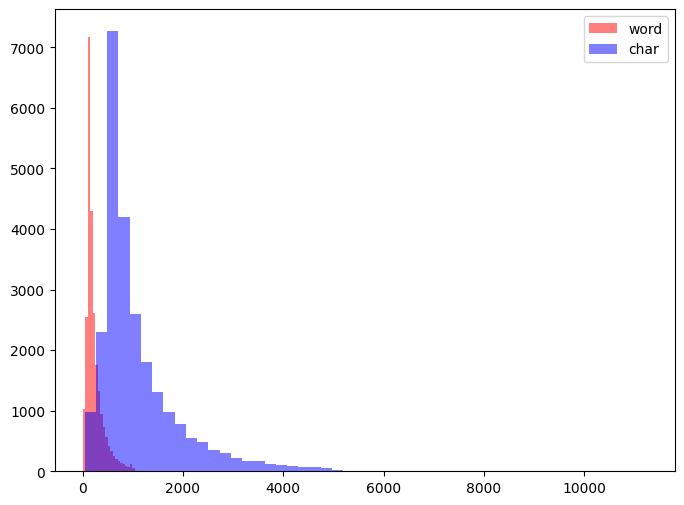

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(tokenized_reviews_word, bins=50, alpha=0.5, color='r', label='word')
ax.hist(tokenized_reviews_char, bins=50, alpha=0.5, color='b', label='char')
ax.legend()
plt.show()

In [12]:
summary_token(tokenized_reviews_word)

문장의 최대 길이:2470
문장의 최소 길이:10
문장의 평균 길이:233.78824
문장의 중앙 값:174.0
문장의 1사분위 길이:127.0
문장의 3사분위 길이:284.0


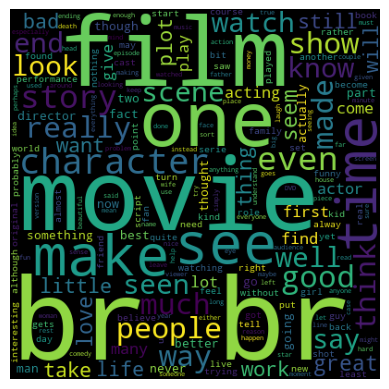

In [31]:
from wordcloud import WordCloud, STOPWORDS
word_cloud = WordCloud(stopwords=STOPWORDS, width=400, height=400)
word_cloud.generate(" ".join(reviews))

plt.figure()
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [32]:
qmarks = np.mean(train_df['review'].apply(lambda x : "?" in x))
dots = np.mean(train_df['review'].apply(lambda x : "." in x))
qmarks = np.mean(train_df['review'].apply(lambda x : "?" in x))
print(qmarks)

0.29552


In [33]:
import json
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [22]:
review = train_df['review'][0]
review_text = BeautifulSoup(review).get_text()
review_text = re.sub('[^a-zA-Z]', '', review)

stop_words = set(stopwords.words('english'))
review_text_low = review_text.lower()
# review_text_low_list = [r.split() for r in review_text_low]
review_text_low_list = review_text_low.split()

words = [w for w in review_text_low_list if w not in stop_words]
print(words)

['withallthisstuffgoingdownatthemomentwithmjivestartedlisteningtohismusicwatchingtheodddocumentaryhereandtherewatchedthewizandwatchedmoonwalkeragainmaybeijustwanttogetacertaininsightintothisguywhoithoughtwasreallycoolintheeightiesjusttomaybemakeupmymindwhetherheisguiltyorinnocentmoonwalkerispartbiographypartfeaturefilmwhichiremembergoingtoseeatthecinemawhenitwasoriginallyreleasedsomeofithassubtlemessagesaboutmjsfeelingtowardsthepressandalsotheobviousmessageofdrugsarebadmkaybrbrvisuallyimpressivebutofcoursethisisallaboutmichaeljacksonsounlessyouremotelylikemjinanywaythenyouaregoingtohatethisandfinditboringsomemaycallmjanegotistforconsentingtothemakingofthismoviebutmjandmostofhisfanswouldsaythathemadeitforthefanswhichiftrueisreallyniceofhimbrbrtheactualfeaturefilmbitwhenitfinallystartsisonlyonforminutesorsoexcludingthesmoothcriminalsequenceandjoepesciisconvincingasapsychopathicallpowerfuldruglordwhyhewantsmjdeadsobadisbeyondmebecausemjoverheardhisplansnahjoepescischaracterrantedthathewan

In [23]:
clean_review = ' '.join(words)
print(clean_review)

withallthisstuffgoingdownatthemomentwithmjivestartedlisteningtohismusicwatchingtheodddocumentaryhereandtherewatchedthewizandwatchedmoonwalkeragainmaybeijustwanttogetacertaininsightintothisguywhoithoughtwasreallycoolintheeightiesjusttomaybemakeupmymindwhetherheisguiltyorinnocentmoonwalkerispartbiographypartfeaturefilmwhichiremembergoingtoseeatthecinemawhenitwasoriginallyreleasedsomeofithassubtlemessagesaboutmjsfeelingtowardsthepressandalsotheobviousmessageofdrugsarebadmkaybrbrvisuallyimpressivebutofcoursethisisallaboutmichaeljacksonsounlessyouremotelylikemjinanywaythenyouaregoingtohatethisandfinditboringsomemaycallmjanegotistforconsentingtothemakingofthismoviebutmjandmostofhisfanswouldsaythathemadeitforthefanswhichiftrueisreallyniceofhimbrbrtheactualfeaturefilmbitwhenitfinallystartsisonlyonforminutesorsoexcludingthesmoothcriminalsequenceandjoepesciisconvincingasapsychopathicallpowerfuldruglordwhyhewantsmjdeadsobadisbeyondmebecausemjoverheardhisplansnahjoepescischaracterrantedthathewante

In [29]:
def preprocessing(review, mystopwords, remove_stopwords=False):
    review_text = BeautifulSoup(review, 'html').get_text()
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    words = review_text.lower().split()
    
    if remove_stopwords:
        stops =set(stopwords.words('english') + mystopwords)
        words = [w for w in words if w not in stops]
    
    clean_review = ' '.join(words)
    
    return clean_review

In [30]:
clean_train_reviews = []
for review in train_df['review']:
    clean_train_reviews.append(preprocessing(review, [], remove_stopwords=True))

C:\Users\frank\AppData\Local\Temp\ipykernel_12908\1138981177.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, 'html').get_text()
